# Some code from chapters 1-2

In [4]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

import seaborn as sns
import matplotlib.pyplot as mth
import statsmodels.formula.api as smf

In [5]:
youtubeUS = pd.read_csv('USvideos.csv')
youtubeUS.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",993345,65551,3544,8128,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,7494,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,1374,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,16635,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,3050,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....


In [6]:
youtubeUS['description'] = youtubeUS['description'].fillna('')
youtubeUS.description.isna().value_counts()


False    200
Name: description, dtype: int64

In [7]:
youtubeUS['category_name'] = np.nan

youtubeUS.loc[(youtubeUS["category_id"] == 1),"category_name"] = 'Film and Animation'
youtubeUS.loc[(youtubeUS["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
youtubeUS.loc[(youtubeUS["category_id"] == 10),"category_name"] = 'Music'
youtubeUS.loc[(youtubeUS["category_id"] == 15),"category_name"] = 'Pets and Animals'
youtubeUS.loc[(youtubeUS["category_id"] == 17),"category_name"] = 'Sport'
youtubeUS.loc[(youtubeUS["category_id"] == 19),"category_name"] = 'Travel and Events'
youtubeUS.loc[(youtubeUS["category_id"] == 20),"category_name"] = 'Gaming'
youtubeUS.loc[(youtubeUS["category_id"] == 22),"category_name"] = 'People and Blogs'
youtubeUS.loc[(youtubeUS["category_id"] == 23),"category_name"] = 'Comedy'
youtubeUS.loc[(youtubeUS["category_id"] == 24),"category_name"] = 'Entertainment'
youtubeUS.loc[(youtubeUS["category_id"] == 25),"category_name"] = 'News and Politics'
youtubeUS.loc[(youtubeUS["category_id"] == 26),"category_name"] = 'How to and Style'
youtubeUS.loc[(youtubeUS["category_id"] == 27),"category_name"] = 'Education'
youtubeUS.loc[(youtubeUS["category_id"] == 28),"category_name"] = 'Science and Technology'
youtubeUS.loc[(youtubeUS["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
youtubeUS.loc[(youtubeUS["category_id"] == 43),"category_name"] = 'Reports and Reviews'


In [8]:
youtubeUS['publish_time'] = pd.to_datetime(youtubeUS['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtubeUS['publish_time']

0     2017-11-13 07:30:00
1     2017-11-12 19:05:24
2     2017-11-13 11:00:04
3     2017-11-12 18:01:41
4     2017-11-12 21:50:37
5     2017-11-12 05:37:17
6     2017-11-13 00:51:15
7     2017-11-12 00:01:11
8     2017-11-12 22:00:01
9     2017-11-12 14:00:00
10    2017-11-12 17:00:05
11    2017-11-13 03:00:00
12    2017-11-12 16:46:33
13    2017-11-13 13:45:16
14    2017-11-10 17:00:03
15    2017-11-12 16:00:01
16    2017-11-12 18:00:03
17    2017-11-10 18:23:05
18    2017-11-11 19:03:43
19    2017-04-21 06:47:32
20    2017-11-10 23:05:25
21    2017-11-11 16:00:01
22    2017-11-11 15:00:03
23    2017-11-10 15:00:00
24    2017-11-11 15:00:00
25    2017-11-12 00:45:54
26    2017-11-11 18:08:04
27    2017-11-10 19:06:23
28    2017-11-12 05:55:42
29    2011-05-29 17:03:12
              ...        
170   2017-11-08 15:00:27
171   2017-11-08 21:00:01
172   2017-11-08 16:01:41
173   2017-11-07 16:59:54
174   2017-11-09 18:00:33
175   2017-11-07 18:15:45
176   2017-11-10 14:57:32
177   2017-1

In [9]:
youtubeUS['likes_rate'] = youtubeUS['likes'] / youtubeUS['views'] * 100
youtubeUS['dislikes_rate'] = youtubeUS['dislikes'] / youtubeUS['views'] * 100
youtubeUS['comment_count_rate'] = youtubeUS['comment_count'] / youtubeUS['views'] * 100

In [10]:
youtubeUS['months'] = youtubeUS['publish_time'].dt.month

In [11]:
youtubeUS['likes_log'] = np.log(youtubeUS['likes']+1)
youtubeUS['dislikes_log'] = np.log(youtubeUS['dislikes']+1)
youtubeUS['comments_log'] = np.log(youtubeUS['comment_count']+1)
youtubeUS['views_log'] = np.log(youtubeUS['views']+1)


In [12]:
youtubeUS.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,category_name,likes_rate,dislikes_rate,comment_count_rate,months,likes_log,dislikes_log,comments_log,views_log
0,1ZAPwfrtAFY,17.13.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",993345,65551,3544,...,"One year after the presidential election, John...",Entertainment,6.599016,0.356774,0.818245,11,11.090599,8.173293,9.003193,13.808834
1,5qpjK5DgCt4,17.13.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",2568721,132724,4495,...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,5.166929,0.174990,0.291741,11,11.796035,8.410943,8.921991,14.758919
2,puqaWrEC7tY,17.13.11,Nickleback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",118585,6183,361,...,Today we find out if Link is a Nickelback amat...,Entertainment,5.213982,0.304423,1.158663,11,8.729721,5.891644,7.226209,11.683394
3,d380meD0W0M,17.13.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",1867990,123933,1836,...,I know it's been a while since we did this sho...,Entertainment,6.634564,0.098287,0.890529,11,11.727504,7.515889,9.719324,14.440374
4,nc99ccSXST0,17.13.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",669608,21357,591,...,Ice Cream Pint Combination Lock - http://amzn....,Science and Technology,3.189478,0.088261,0.455490,11,9.969182,6.383507,8.023225,13.414449


### Linear squares 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

For this lab I used sklearn library and thinkstats classes, both.

But I shall explain them both, starting with sklearn method.

Basically, here I am going to make a simple linear regression model, thus I have splitted the data into training and test sets.

In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(youtubeUS.likes.to_frame(), 
                                                youtubeUS.dislikes.to_frame(), 
                                                test_size = 1/3, random_state = 0)

Then I used fit function of LinearRegression object to make it “learn” using the above separated training data.

In [37]:
reg = LinearRegression().fit(xTrain, yTrain)

And now, since the model has already been trained, I can generate the interception and the slope of the line, which will be:

In [50]:
reg.intercept_[0], reg.coef_[0][0]

(-605.6466215178916, 0.05879266235505049)

By prediction the xTest on our built model, we can get the mean squared error in further

In [39]:
yPrediction = reg.predict(xTest)

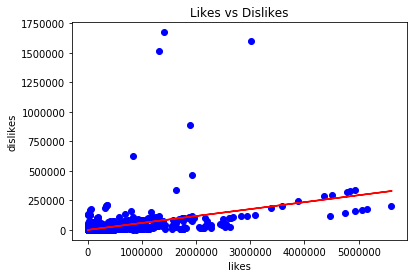

In [78]:
mth.scatter(xTest, yTest, color = 'blue')
mth.plot(xTrain, reg.predict(xTrain), color = 'red')
mth.title('Likes vs Dislikes')
mth.xlabel('likes')
mth.ylabel('dislikes')
mth.show()

And here's how the model looks like on the plot.

Nonetheless, the interception and slope would make more sense, if I would 'predict' the dislikes number on likes.

So let's say I want to know what would be the dislikes amount on the video that has got 3.9m likes

And this can be determined by the simple linear formula y = x*Slope + Intercept

In [61]:
-605.64662152+0.05879266*3900000

228685.72737848

So yes, regarding to our plot, we can really say that more the likes on the video, the less dislikes was gained.

In [71]:
print("Mean squared error: %.2f" % mean_squared_error(yTest, yPrediction))
print('r_2 statistic: %.2f' % r2_score(yTest, yPrediction))

Mean squared error: 661068971.59
r_2 statistic: 0.19


#### Alan classes for simple linear regression

In [72]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

The function above takes sequences xs and ys and returns the estimated parameters inter and slope

In [74]:
inter, slope = LeastSquares(youtubeUS.likes, youtubeUS.dislikes)
inter, slope

(-500.78425795106705, 0.05671700787527557)

Yes, if you have noticed, the intercept from SciKit and LeastSquares differ, but that's because previously I have splitted into train and test and now I don't.

In [75]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

There is also a FitLine function, which takes inter and slope and returns the fitted line for a sequence of xs.

In [76]:
fit_xs, fit_ys = FitLine(youtubeUS.likes, inter, slope)

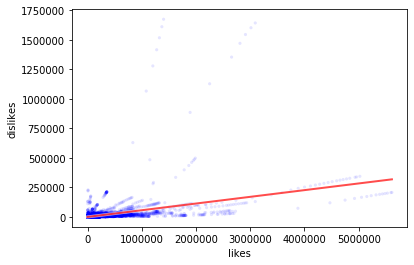

In [77]:
thinkplot.Scatter(youtubeUS.likes, youtubeUS.dislikes, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="likes",
                 ylabel='dislikes',
                 legend=False)

But anyways, the line remains the same as in the first case and here, too

### Residuals

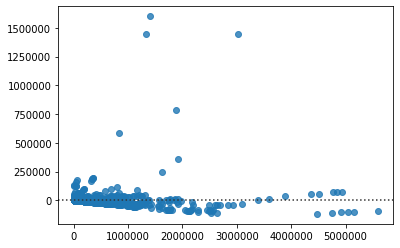

In [68]:
sns.residplot(xTest, yTest)

Refering to the plot above, we see that our residuals show an actual pattern, which is specifically suitable for nonlinear relationship

Here also I tried to experience with seaborn lib, that provides residplot special for estimation of residuals.

In [79]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [80]:
youtubeUS['residual'] = Residuals(youtubeUS.likes, youtubeUS.dislikes, inter, slope)

thinkstats function Residuals returns the differences between the actual values and the fitted line

In [109]:
bins = np.arange(0, 6000000, 1000000)
indices = np.digitize(youtubeUS.likes, bins)
groups = youtubeUS.groupby(indices)

likes_means = [group.likes.mean() for _, group in groups]
likes_means

[57677.06367668803,
 1383175.0383141763,
 2429730.38028169,
 3414447.111111111,
 4560537.470588235,
 5348477.363636363]

In [110]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups]
cdfs

[Cdf([-53107.89868755 -52749.73981149 -51488.94612515 ... 224121.45932818
  228383.88905857 582240.64365312], [2.46426811e-05 4.92853622e-05 7.39280434e-05 ... 9.99950715e-01
  9.99975357e-01 1.00000000e+00]),
 Cdf([-9.64831400e+04 -9.06446642e+04 -9.05270496e+04 -9.03852853e+04
  -9.03809855e+04 -9.02093298e+04 -9.01399463e+04 -8.97186765e+04
  -8.95276743e+04 -8.94062296e+04 -8.92609421e+04 -8.90534470e+04
  -8.89394625e+04 -8.87351161e+04 -8.86025857e+04 -8.82728199e+04
  -8.79264086e+04 -8.76808397e+04 -8.74962046e+04 -8.69312885e+04
  -8.63264994e+04 -8.62558395e+04 -8.48714923e+04 -8.32186814e+04
  -8.28731516e+04 -8.06018990e+04 -8.04415698e+04 -7.87550697e+04
  -7.64156742e+04 -7.59849861e+04 -7.46602760e+04 -7.43673171e+04
  -7.39939089e+04 -7.27436398e+04 -7.26740395e+04 -7.10998395e+04
  -6.83350249e+04 -6.41109916e+04 -5.95584983e+04 -5.94656848e+04
  -5.93332740e+04 -5.92012841e+04 -5.91453549e+04 -5.88436942e+04
  -5.87312892e+04 -5.86315780e+04 -5.83650494e+04 -5.8109222

In [111]:
def PlotPercentiles(likes_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        dislikes_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(likes_means, dislikes_percentiles, label=label)

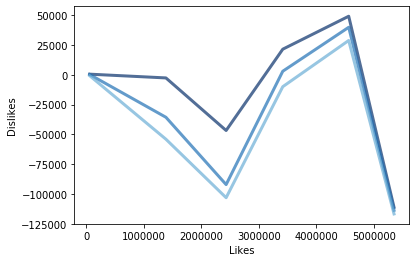

In [112]:
PlotPercentiles(likes_means, cdfs)

thinkplot.Config(xlabel="Likes",
                 ylabel='Dislikes')

To plot the residuals, I group respondents by likes and compute percentiles in each group. The plot above shows the 25th, 50th and 75th percentiles of the residuals for each likes group.

And additionally, regarding to the plot above, I can say that linear regression does not fit on this data well, so it is possible to say that this relationship is nonlinear.

### Sampling distribution


In [113]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    return SampleRows(df, len(df), replace=True)

In [115]:
def SamplingDistributions(data, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(data)
        likes = sample.likes
        dislikes = sample.dislikes
        estimates = LeastSquares(likes, dislikes)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

In [116]:
inters, slopes = SamplingDistributions(youtubeUS, iters=1001)

In [117]:
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [118]:
Summarize(inters), Summarize(slopes)

mean, SE, CI -503.0840886764376 265.1359472308858 (-963.1380862534365, -99.6770174961107)
mean, SE, CI 0.05675732620176603 0.005058012713614648 (0.048867278840467994, 0.06539756582767957)


(None, None)

The sampling distribution function of thinkstats shows how much the estimates would vary if we ran the experiment over and over. And we can also generate mean, Standard Error and Confindence Interval for this sampling distribution.

### Visualizing uncertainty

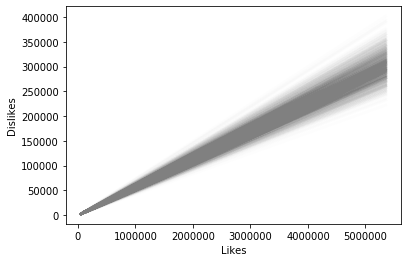

In [119]:
for slope, inter in zip(slopes, inters):
    fxs, fys = FitLine(likes_means, inter, slope)
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.01)
    
thinkplot.Config(xlabel="Likes",
                 ylabel='Dislikes')

In [120]:
def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

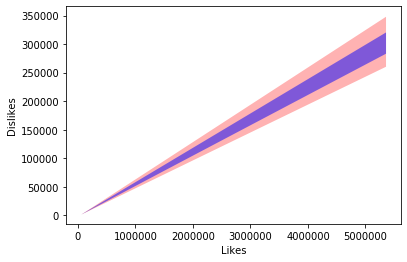

In [125]:
PlotConfidenceIntervals(likes_means, inters, slopes, percent=90, 
                        color='red', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(likes_means, inters, slopes, percent=50,
                        color='blue', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="Likes",
                 ylabel='Dislikes')

In this section we just simply plotted the confidence intervals gained from interception and slopes

### Coefficient of determination

In [126]:
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

In [128]:
inter, slope = LeastSquares(youtubeUS.likes, youtubeUS.dislikes)
res = Residuals(youtubeUS.likes, youtubeUS.dislikes, inter, slope)
r2 = CoefDetermination(youtubeUS.dislikes, res)
r2

0.1999757328841716

In [129]:
print('rho', thinkstats2.Corr(youtubeUS.likes, youtubeUS.dislikes))
print('R', np.sqrt(r2))   

rho 0.4471864632166004
R 0.44718646321660005


In [130]:
print('Std(ys)', Std(youtubeUS.dislikes))
print('Std(res)', Std(res))

Std(ys) 29029.351481117723
Std(res) 25965.03510316771


### Hypothesis testing with slopes

In [131]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        ages, weights = data
        _, slope = thinkstats2.LeastSquares(ages, weights)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        ages, _ = self.data
        weights = self.ybar + np.random.permutation(self.res)
        return ages, weights

In [132]:
ht = SlopeTest((youtubeUS.likes, youtubeUS.dislikes))
pvalue = ht.PValue()
pvalue

0.0

In [133]:
ht.actual, ht.MaxTestStat()

(0.05671700787527557, 0.004417453955343484)

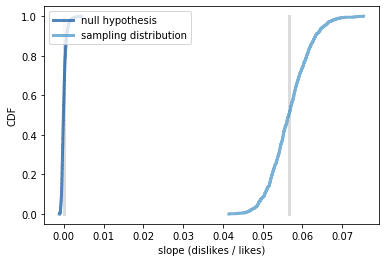

In [134]:
sampling_cdf = thinkstats2.Cdf(slopes)

thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='null hypothesis')

thinkplot.Cdf(sampling_cdf, label='sampling distribution')

thinkplot.Config(xlabel='slope (dislikes / likes)',
                   ylabel='CDF',
                   legend=True, loc='upper left')

In [135]:
pvalue = sampling_cdf[0]
pvalue

0

### Resampling with weights

In [137]:
def ResampleRowsWeighted(df, column='dislikes'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

In [138]:
iters = 100
estimates = [ResampleRowsWeighted(youtubeUS).dislikes.mean()
             for _ in range(iters)]
Summarize(estimates)

mean, SE, CI 231090.140496227 2306.2698300159873 (226989.96820435175, 234493.93526093432)


## Multiple regression

In [140]:
formula = 'dislikes ~ likes'
model = smf.ols(formula, data=youtubeUS)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:17:30   Log-Likelihood:            -4.7433e+05
No. Observations:               40949   AIC:                         9.487e+05
Df Residuals:                   40947   BIC:                         9.487e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -500.7843    134.901     -3.712      0.000    -765.193    -236.376
likes          0.0567      0.001    101.169      0.000       0.056       0.058
==============================================================================
Omnibus:                   121721.481   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8674323462.162
Skew:                          43.006   Prob(JB):                         0.00
Kurtosis:                    2256.126   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I tested the previously done lab with statsmodel, and it was similar

In [141]:
inter = results.params['Intercept']
slope = results.params['likes']
inter, slope

(-500.78425795106256, 0.05671700787527547)

In [143]:
results.pvalues.likes

0.0

In [144]:
results.rsquared

0.1999757328841717

In [146]:
youtubeUS.category_id[:5]

0    22
1    24
2    23
3    24
4    24
Name: category_id, dtype: int64

In [147]:
formula = 'dislikes ~ C(category_id)'
results = smf.ols(formula, data=youtubeUS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     33.76
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           1.11e-97
Time:                        11:31:23   Log-Likelihood:            -4.7865e+05
No. Observations:               40949   AIC:                         9.573e+05
Df Residuals:                   40933   BIC:                         9.575e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2590.6814    595.910      4.347      0.000    1422.684    3758.679
C(category_id)[T.2]  -1957.8429   1588.609     -1.232      0.218   -5071.552    1155.866
C(category_id)[T.10]  5317.0763    695.540      7.645      0.000    3953.803    6680.350
C(category_id)[T.15] -2017.4434   1122.609     -1.797      0.072   -4217.782     182.896
C(category_id)[T.17]  -229.3424    859.157     -0.267      0.790   -1913.308    1454.624
C(category_id)[T.19] -1743.8481   1557.748     -1.119      0.263   -4797.069    1309.373
C(category_id)[T.20]  8651.0150   1172.333      7.379      0.000    6353.217    1.09e+04
C(category_id)[T.22]   583.1195    783.918      0.744      0.457    -953.376    2119.615
C(category_id)[T.23]  -499.1596    772.005     -0.647      0.518   -2012.306    1013.987
C(category_id)[T.24]  1723.6163    662.332      2.602      0.009     425.432    3021.801
C(category_id)[T.25]  -909.9219    830.628     -1.095      0.273   -2537.971     718.127
C(category_id)[T.26] -1270.3971    745.628     -1.704      0.088   -2731.844     191.050
C(category_id)[T.27] -1774.2732    926.265     -1.916      0.055   -3589.772      41.226
C(category_id)[T.28]  -696.3033    837.816     -0.831      0.406   -2338.441     945.835
C(category_id)[T.29]  5.549e+04   3868.388     14.343      0.000    4.79e+04    6.31e+04
C(category_id)[T.43] -2160.7165   3868.388     -0.559      0.576   -9742.842    5421.409
==============================================================================
Omnibus:                   119152.745   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       7035103099.317
Skew:                          40.607   Prob(JB):                         0.00
Kurtosis:                    2031.951   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
formula = 'dislikes ~ C(category_id) + likes'
results = smf.ols(formula, data=youtubeUS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dislikes   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     675.5
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:33:55   Log-Likelihood:            -4.7410e+05
No. Observations:               40949   AIC:                         9.482e+05
Df Residuals:                   40932   BIC:                         9.484e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1563.2206    534.888     -2.923      0.003   -2611.613    -514.829
C(category_id)[T.2]   1547.2586   1422.125      1.088      0.277   -1240.138    4334.655
C(category_id)[T.10] -3375.3637    628.398     -5.371      0.000   -4607.038   -2143.689
C(category_id)[T.15]   900.9234   1005.078      0.896      0.370   -1069.051    2870.898
C(category_id)[T.17]  1262.5574    769.031      1.642      0.101    -244.760    2769.875
C(category_id)[T.19]  1704.0942   1394.501      1.222      0.222   -1029.158    4437.347
C(category_id)[T.20]  7846.2432   1049.191      7.478      0.000    5789.806    9902.680
C(category_id)[T.22]  1325.5523    701.593      1.889      0.059     -49.586    2700.691
C(category_id)[T.23]   -17.6459    690.910     -0.026      0.980   -1371.845    1336.553
C(category_id)[T.24]  2753.1460    592.831      4.644      0.000    1591.184    3915.108
C(category_id)[T.25]  2815.7047    744.274      3.783      0.000    1356.911    4274.498
C(category_id)[T.26]   578.1581    667.539      0.866      0.386    -730.234    1886.550
C(category_id)[T.27]   634.1602    829.290      0.765      0.444    -991.266    2259.586
C(category_id)[T.28]  1440.4814    750.089      1.920      0.055     -29.710    2910.673
C(category_id)[T.29]  4.439e+04   3463.700     12.815      0.000    3.76e+04    5.12e+04
C(category_id)[T.43]   878.6179   3462.084      0.254      0.800   -5907.142    7664.378
likes                    0.0587      0.001    100.878      0.000       0.058       0.060
==============================================================================
Omnibus:                   121736.342   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8758830118.080
Skew:                          43.014   Prob(JB):                         0.00
Kurtosis:                    2267.090   Cond. No.                     6.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In multiple linear regression, I used one categorical parameter - category of video, and the ordinary least squares returned the statistical result stating that not all of category parameter types are applicable to the multiple regression regarding to the column above 'P>t'